# Template Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

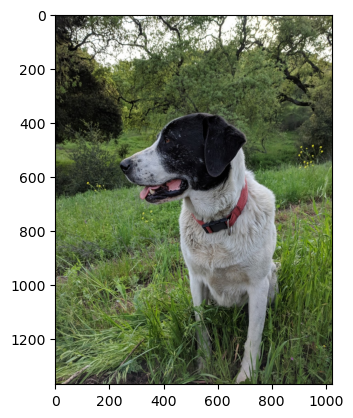

In [2]:
im = cv2.imread('../DATA/sammy.jpg')
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(img);

### Template Image

A subset of the image. Note how its actually the exact image. Later on we'll discuss more advanced methods for general matching, such as facial recognition.

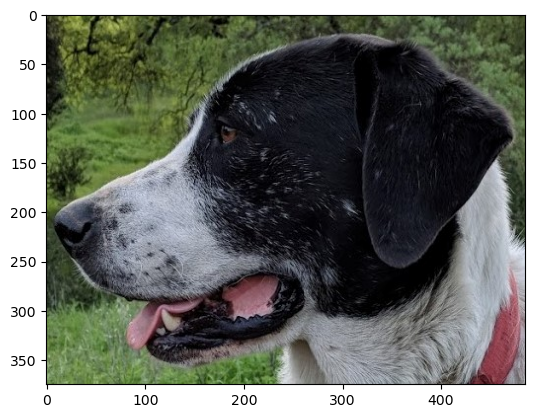

In [3]:
fac = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(fac, cv2.COLOR_BGR2RGB)
plt.imshow(face);

**Quick Note on eval()**  
eval() function allows us to execute strings as a Python instruction. It accepts a string and returns an object.  
eval() is not limited to a simple expression. We can execute functions, method calls, etc.

In [4]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

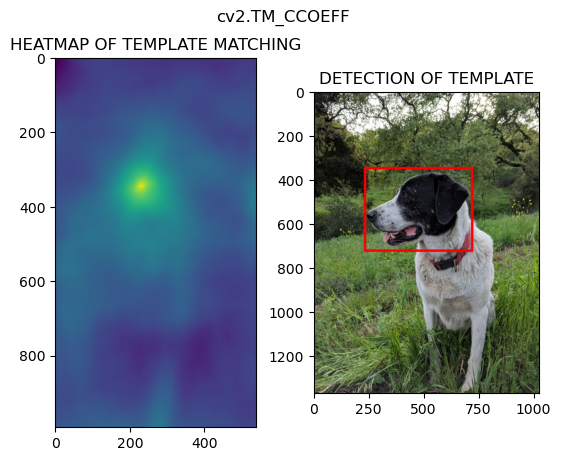

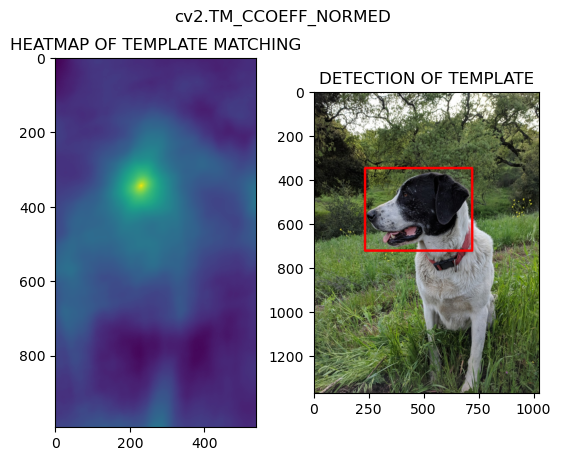

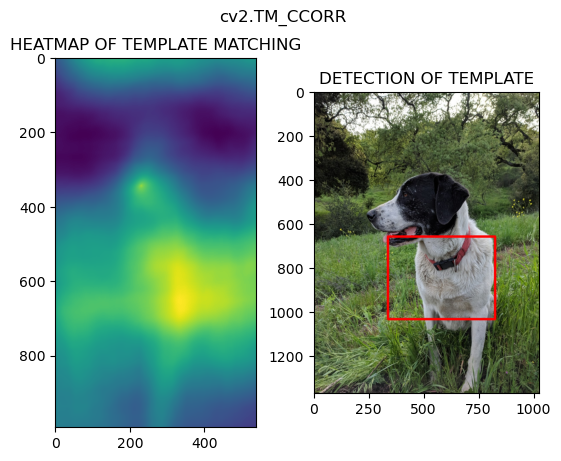

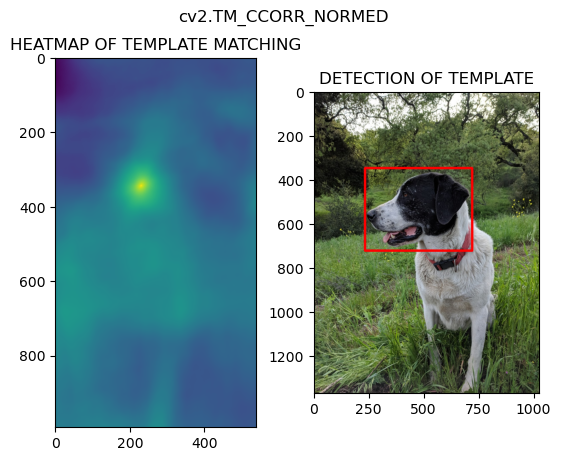

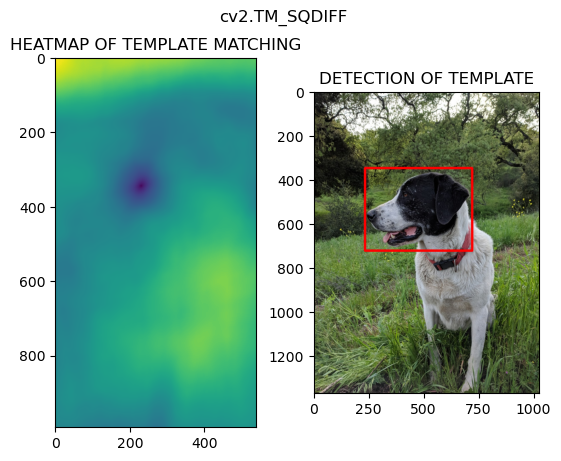

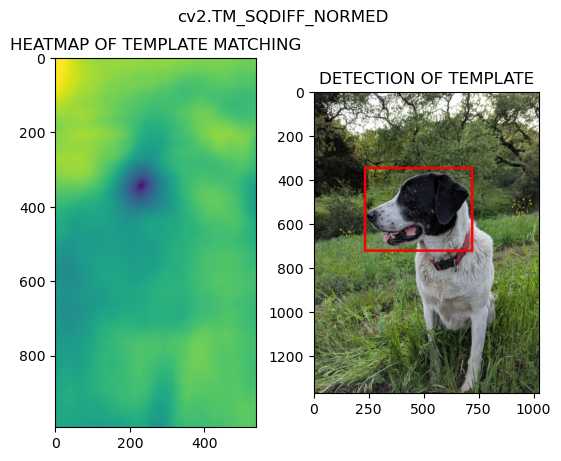

In [6]:
for m in methods:
    
    # Create a copy
    full_copy = img.copy()
    
    method = eval(m)
    
    # Template Matching
    res = cv2.matchTemplate(full_copy,face,method)
    # Grab the Max and Min values, plus their locations
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    # set up a drawing rectangle
    
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
    else:
        top_left = max_loc
    
    height,width,channels = face.shape
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    
    # PLOT AND SHOW THE IMAGES
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    # TITKE WITH THE METHOD USED
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')